<a href="https://colab.research.google.com/github/evmpython/CAT212_2025/blob/main/CAT212_Aula_03_Estacoes_meteorologicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Disciplina:** CAT212 - Microfísica de Nuvens e Eletricidade Atmosférica
---

## 🟢  **Aula Prática 3:** $\underline{Trabalhando\ com\ dados\ de\ Estações\ Meteorológicas}$

---


**OBJETIVO:**
Nesta aula prática aprenderemos como baixar e trabalhar com dados de **Estações Meteorológicas de Superfície (EMS)** do INMET.

---


**DADOS DE ENTRADA**:
- **Tipo do dado:** tabela em formato CSV
- **Formato do dado:** arquivo TEXTO
- **Nome do arquivo:** INMET_SE_MG_A521_BELO HORIZONTE (PAMPULHA)_01-01-2021_A_31-12-2021.CSV
- **Fonte dos dados:** INMET


---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura e tabela
- **Formato do dado:** arquivo JPG e CSV
- **Imagens geradas:**
    1. Fig_1a_horario_climatologia_precipitacao.jpg
    2. Fig_1b_horario_climatologia_radiacao_temperatura.jpg
    3. Fig_2_diario_precipitacao.jpg
    4. Fig_3a_mensal_precipitacao.jpg
    5. Fig_3b_mensal_climatologia_precipitacao.jpg
    6. Fig_4_anual_precipitacao.jpg
    7. tabela_mensal.csv



---

**PROCEDIMENTO REALIZADO:**
- Os seguintes procedimentos são realizados nesse código:

1.   Instação das bibliotecas **hydrobr** e **proplot**
2.   Importação das biblotecas
3.   Download e tratamento dos dados
4.   Plotar gráfico do **ciclo horário**
5.   Plotar gráfico do **ciclo diário**
6.   Plotar gráfico do **ciclo mensal**
7.   Plotar gráfico do **ciclo anual**
8.   Salvar os dados em arquivo **csv**


---

- **Todas** as estações retornam as seguintes variáveis:
    1. T: Temperatura (Tinst, Tmax e Tmin) [C]
    2. RH: Umidade Relativa (RHins, RHmax e RHmin) [%];
    3. DP: Temperatura do Ponto de Orvalho (DPinst, DPmax, DPmin) [C]
    4. P: Pressão Atmosférica (Pinst, Pmax, Pmin) [hPa]
    5. Wspeed: Velocidade do Vento [m/s]
    6. Wdir: Direção do Vento [º]
    7. Rad: Radiação [kJ/m²]
    8. Prec: Precipitação [mm]



---




**OBSERVAÇÕES IMPORTANTES**:
1. Mudar o caminho para o do seu drive.
2. Vocês deverão escolher a estação de superfície pelo **código**.



---
**PROFESSOR:**

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Atualizado em: 31/03/2025




---



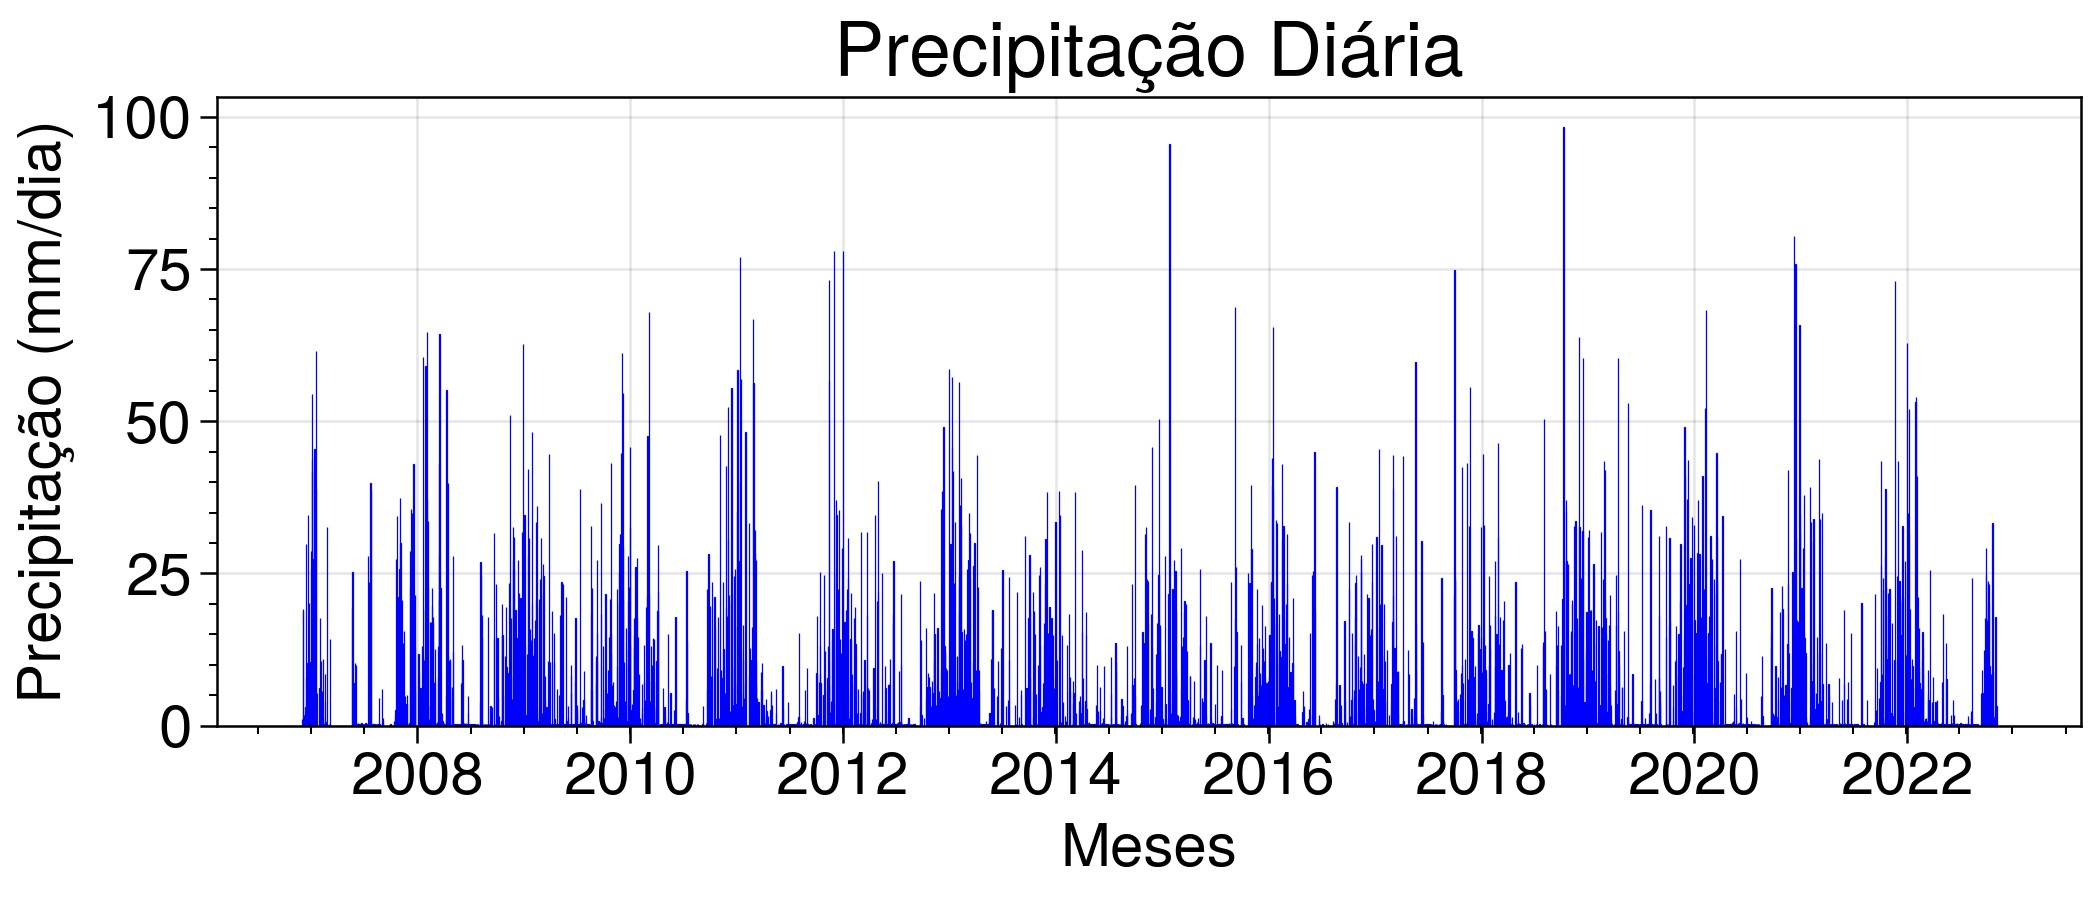

# **1° Passo:** Instalando bibliotecas

In [ ]:
!pip install -q ultraplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 40.3 MB/s eta 0:00:00


# **2° Passo:** Importando Bibliotecas

In [ ]:
import numpy as np              # NumPy: trabalha com arrays
import pandas as pd             # Pandas: trabalha com tabelas
import matplotlib.pyplot as plt # Matplotlib: o fundamento de toda a criação de gráficos em Python
import ultraplot as uplt         # Proplot: pacote de visualização de gráficos e mapas com dados meteorológicos em alto nível
import plotly.offline           # Plotly: faz gráficos interativos
import pytz                     # Pytz: transforma hora UTC para hora local
import seaborn as sns           # Seaborn: trabalha com gráficos estatísticos
import os
import zipfile
import time
import glob

# vamos ignorar avisos
import warnings
warnings.filterwarnings("ignore")

# **3° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/1_PRIMEIRO_SEMESTRE/CAT212 - MICROFÍSICA DE NUVENS E ELETRICIDADE ATMOSFÉRICA/AULAS/CAT212 - PYTHON PARA METEOROLOGIA FÍSICA/AULA_03_ESTACOES_METEOROLOGICAS'

- Criando a pasta de saída ("output")

In [ ]:
os.makedirs(f'{dir}/output/', exist_ok=True)

# **PARTE 1):** Leitura e organização dos dados do INMET

**Descompatando os arquivos `.zip`**

In [ ]:
# loop nos anos
for ano in range(2020, 2025):

    print('DESCOMPACTANDO ANO === >>>', ano)

    # abre o arquivo ZIP e extrai tudo
    with zipfile.ZipFile(f'{dir}/input/{str(ano)}.zip', 'r') as zip_ref:
        zip_ref.extractall("/content/")

DESCOMPACTANDO ANO === >>> 2020
DESCOMPACTANDO ANO === >>> 2021
DESCOMPACTANDO ANO === >>> 2022
DESCOMPACTANDO ANO === >>> 2023
DESCOMPACTANDO ANO === >>> 2024


**Leitura dos arquivos `CSV`**
- INMET_SE_MG_A521_BELO HORIZONTE (PAMPULHA)_01-01-2021_A_31-12-2021.CSV

In [ ]:
estacao = 'A515'

In [ ]:
files = sorted(glob.glob(f'/content/INMET*{estacao}*'))
files

['/content/INMET_SE_MG_A515_VARGINHA_01-01-2020_A_31-12-2020.CSV',
 '/content/INMET_SE_MG_A515_VARGINHA_01-01-2021_A_31-12-2021.CSV',
 '/content/INMET_SE_MG_A515_VARGINHA_01-01-2022_A_31-12-2022.CSV',
 '/content/INMET_SE_MG_A515_VARGINHA_01-01-2023_A_31-12-2023.CSV',
 '/content/INMET_SE_MG_A515_VARGINHA_01-01-2024_A_31-12-2024.CSV']

In [ ]:
# leitura da tabela, apenas do cabeçalho das estações. Faz a leitura apenas do cabeçalho dos dados
#info_estacao = pd.read_csv(file, encoding='iso-8859-1', nrows=7,  decimal=',', delimiter=';')

In [ ]:
# lista vazia para armazenar os DataFrames de cada ano
dfs = []

# loop nos arquivos
for file in files:

    print(file)

    # leitura da tabela
    df = pd.read_csv(file, encoding='iso-8859-1', skiprows=8,  decimal=',', delimiter=';')

    # adiciona o DataFrame à lista inicial
    dfs.append(df)

/content/INMET_SE_MG_A515_VARGINHA_01-01-2020_A_31-12-2020.CSV
/content/INMET_SE_MG_A515_VARGINHA_01-01-2021_A_31-12-2021.CSV
/content/INMET_SE_MG_A515_VARGINHA_01-01-2022_A_31-12-2022.CSV
/content/INMET_SE_MG_A515_VARGINHA_01-01-2023_A_31-12-2023.CSV
/content/INMET_SE_MG_A515_VARGINHA_01-01-2024_A_31-12-2024.CSV


Após esse procedimento, a lista `dfs` conterá `DataFrames` correspondentes aos dados de cada ano de 2011 a 2024. Isso vai permitir que você tenha acesso aos dados e faça análises ou manipulações posteriores com eles com Python.

Mas antes, vamos precisar organizar os dados da lista com `pd.concat()` e colocá-los no formato final.

In [ ]:
# concatenar DataFrames
dados = pd.concat(dfs, ignore_index=True)
dados.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2020/01/01,0000 UTC,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7,NaN
1,2020/01/01,0100 UTC,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5,NaN
2,2020/01/01,0200 UTC,0.0,906.2,906.4,906.2,NaN,20.8,17.9,21.5,20.8,18.0,17.6,84.0,79.0,83.0,57.0,4.7,2.3,NaN
3,2020/01/01,0300 UTC,0.0,906.5,906.5,906.2,NaN,21.6,18.0,21.6,20.6,18.2,17.9,85.0,80.0,80.0,252.0,3.4,1.0,NaN
4,2020/01/01,0400 UTC,0.8,906.5,906.7,906.5,NaN,19.5,18.5,21.6,19.4,18.5,17.8,94.0,79.0,94.0,316.0,5.7,0.8,NaN


In [ ]:
# remover linhas da coluna "Precipitação" com "NaN"
dados.dropna(subset=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], inplace=True)
dados.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2020/01/01,0000 UTC,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7,NaN
1,2020/01/01,0100 UTC,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5,NaN
2,2020/01/01,0200 UTC,0.0,906.2,906.4,906.2,NaN,20.8,17.9,21.5,20.8,18.0,17.6,84.0,79.0,83.0,57.0,4.7,2.3,NaN
3,2020/01/01,0300 UTC,0.0,906.5,906.5,906.2,NaN,21.6,18.0,21.6,20.6,18.2,17.9,85.0,80.0,80.0,252.0,3.4,1.0,NaN
4,2020/01/01,0400 UTC,0.8,906.5,906.7,906.5,NaN,19.5,18.5,21.6,19.4,18.5,17.8,94.0,79.0,94.0,316.0,5.7,0.8,NaN


In [ ]:
# remover a coluna "Unnamed: 19"
dados.drop(['Unnamed: 19'], axis=1, inplace=True)
dados.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7
1,2020/01/01,0100 UTC,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5
2,2020/01/01,0200 UTC,0.0,906.2,906.4,906.2,NaN,20.8,17.9,21.5,20.8,18.0,17.6,84.0,79.0,83.0,57.0,4.7,2.3
3,2020/01/01,0300 UTC,0.0,906.5,906.5,906.2,NaN,21.6,18.0,21.6,20.6,18.2,17.9,85.0,80.0,80.0,252.0,3.4,1.0
4,2020/01/01,0400 UTC,0.8,906.5,906.7,906.5,NaN,19.5,18.5,21.6,19.4,18.5,17.8,94.0,79.0,94.0,316.0,5.7,0.8


In [ ]:
# Concatenar "Data" e "Hora UTC" e converter para datetime
dados['Data_Hora'] = dados['Data'] + ' ' + dados['Hora UTC'].str.replace(' UTC', '', regex=False)
dados['Data_Hora'] = pd.to_datetime(dados['Data_Hora'], format='%Y/%m/%d %H%M')

# Definir como índice
dados.set_index('Data_Hora', inplace=True)

# Remover colunas antigas
dados.drop(columns=['Data', 'Hora UTC'], inplace=True)

# Exibir as primeiras linhas do dataframe atualizado
dados.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7
2020-01-01 01:00:00,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5
2020-01-01 02:00:00,0.0,906.2,906.4,906.2,NaN,20.8,17.9,21.5,20.8,18.0,17.6,84.0,79.0,83.0,57.0,4.7,2.3
2020-01-01 03:00:00,0.0,906.5,906.5,906.2,NaN,21.6,18.0,21.6,20.6,18.2,17.9,85.0,80.0,80.0,252.0,3.4,1.0
2020-01-01 04:00:00,0.8,906.5,906.7,906.5,NaN,19.5,18.5,21.6,19.4,18.5,17.8,94.0,79.0,94.0,316.0,5.7,0.8


**Utilizando a coluna de índices (nesse exemplo são as datas) para selecionar um tempo específico**: função `loc`

In [ ]:
# selecionando os dados do dia 01, mês 12, ano 2006 às 17 h 00 min e 00 seg
dados.loc['2024-12-01 17:00:00']

,2024-12-01 17:00:00
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",0.0
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",905.6
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),906.5
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),905.6
RADIACAO GLOBAL (Kj/m²),2839.5
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",31.2
TEMPERATURA DO PONTO DE ORVALHO (°C),16.9
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),31.2
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),28.6
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),18.3


In [ ]:
# selecionado desta data/horário apenas a coluna de radiação ("Rad")
dados.loc['2024-12-01 17:00:00']['RADIACAO GLOBAL (Kj/m²)']

np.float64(2839.5)

In [ ]:
# selecionado desta data/horário as colunas de radiação ("Rad"), precipitação("Prec") e Temperatura do ponto do orvalho máxima ("DPmax")
dados.loc['2024-12-03 09:00:00'][['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (Kj/m²)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']]

,2024-12-03 09:00:00
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",4.0
RADIACAO GLOBAL (Kj/m²),6.6
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),20.2


In [ ]:
# selecionando um intervalo de tempo. Neste exemplo estamos selecionado das 17 às 20 horas UTC
dados.loc['2024-12-01 17:00:00': '2024-12-02 20:00:00']

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2024-12-01 17:00:00,0.0,905.6,906.5,905.6,2839.5,31.2,16.9,31.2,28.6,18.3,15.7,52.0,42.0,42.0,13.0,6.3,2.7
2024-12-01 18:00:00,0.0,904.9,905.6,904.9,2259.4,29.1,16.2,31.4,29.1,16.7,15.0,46.0,38.0,46.0,60.0,6.0,2.3
2024-12-01 19:00:00,0.0,904.2,904.9,904.2,1964.0,30.5,14.3,31.7,29.1,16.9,13.8,46.0,35.0,37.0,39.0,5.3,1.9
2024-12-01 20:00:00,0.0,903.8,904.2,903.8,1080.4,30.2,14.7,31.0,30.0,15.7,13.8,42.0,36.0,39.0,27.0,5.2,2.5
2024-12-01 21:00:00,0.0,904.2,904.2,903.8,152.0,27.3,16.1,30.3,27.3,16.4,14.0,51.0,37.0,50.0,68.0,4.2,1.9
2024-12-01 22:00:00,0.0,904.8,904.8,904.2,6.9,25.3,16.6,27.4,25.2,16.6,16.0,59.0,50.0,59.0,61.0,3.5,2.7
2024-12-01 23:00:00,0.0,905.3,905.3,904.7,NaN,24.8,16.8,25.3,24.5,16.8,16.5,62.0,59.0,61.0,46.0,4.4,3.1
2024-12-02 00:00:00,0.0,905.5,905.6,905.2,NaN,24.8,17.1,24.8,24.4,17.1,16.8,63.0,61.0,62.0,40.0,4.7,3.3
2024-12-02 01:00:00,0.0,905.2,905.6,905.2,NaN,24.7,17.6,24.9,24.5,17.6,17.1,65.0,62.0,65.0,28.0,7.9,3.8


# **PARTE 2):**  Tratamento dos dados: DataFrames com `Pandas`. Nesta etapa são criadas as seguintes variáveis:
* 1. horaria_climatologica
* 2. diaria
* 3. mensal
* 4. mensal_climatologia
* 5. anual

**Visualizando a tabela de dados e as datas em formato de índices**

In [ ]:
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7
2020-01-01 01:00:00,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5
2020-01-01 02:00:00,0.0,906.2,906.4,906.2,NaN,20.8,17.9,21.5,20.8,18.0,17.6,84.0,79.0,83.0,57.0,4.7,2.3
2020-01-01 03:00:00,0.0,906.5,906.5,906.2,NaN,21.6,18.0,21.6,20.6,18.2,17.9,85.0,80.0,80.0,252.0,3.4,1.0
2020-01-01 04:00:00,0.8,906.5,906.7,906.5,NaN,19.5,18.5,21.6,19.4,18.5,17.8,94.0,79.0,94.0,316.0,5.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.0,905.0,906.0,905.0,2564.2,29.2,15.8,29.8,28.6,17.8,14.1,50.0,40.0,44.0,287.0,4.4,1.8
2024-12-31 20:00:00,0.0,905.2,905.3,904.9,1063.2,28.0,14.5,30.0,27.7,15.9,14.1,47.0,39.0,44.0,261.0,5.8,0.3
2024-12-31 21:00:00,0.0,905.8,905.8,905.1,273.9,24.1,17.7,28.3,24.1,17.7,14.1,68.0,42.0,68.0,14.0,7.2,2.6


In [ ]:
# para mostrar os nomes dos índices:
dados.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2024-12-31 14:00:00', '2024-12-31 15:00:00',
               '2024-12-31 16:00:00', '2024-12-31 17:00:00',
               '2024-12-31 18:00:00', '2024-12-31 19:00:00',
               '2024-12-31 20:00:00', '2024-12-31 21:00:00',
               '2024-12-31 22:00:00', '2024-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Data_Hora', length=32634, freq=None)

In [ ]:
# para mostrar os nomes das colunas:
dados.columns

Index(['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'],
      dtype='object')

**Convertendo de `Hora UTC` para `Hora Local`**

1.   **Para converter** os horários, precisamos primeiro "dizer" para o `pytz` que esses tempos estão em UTC. Isso é feito com `.tz_localize(pytz.utc)`:
2.   Depois faremos a conversão com `tz_convert()` de acordo com o fuso-horário local. Para **Mária da Fé**, podemos usar o mesmo fuso de São Paulo com `pytz.timezone('America/Sao_Paulo')`.
3.  O `pytz` possui uma lista extensa de horários ao longo do globo, o que vai ser muito útil para a nossa conversão.



In [ ]:
dados.head(2)

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7
2020-01-01 01:00:00,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5


In [ ]:
# mostrar todos os fusos-horários
#pytz.all_timezones

In [ ]:
#dados = dados.set_index(dados.index.tz_localize(pytz.utc).tz_convert(pytz.timezone('America/Sao_Paulo')))

In [ ]:
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7
2020-01-01 01:00:00,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5
2020-01-01 02:00:00,0.0,906.2,906.4,906.2,NaN,20.8,17.9,21.5,20.8,18.0,17.6,84.0,79.0,83.0,57.0,4.7,2.3
2020-01-01 03:00:00,0.0,906.5,906.5,906.2,NaN,21.6,18.0,21.6,20.6,18.2,17.9,85.0,80.0,80.0,252.0,3.4,1.0
2020-01-01 04:00:00,0.8,906.5,906.7,906.5,NaN,19.5,18.5,21.6,19.4,18.5,17.8,94.0,79.0,94.0,316.0,5.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.0,905.0,906.0,905.0,2564.2,29.2,15.8,29.8,28.6,17.8,14.1,50.0,40.0,44.0,287.0,4.4,1.8
2024-12-31 20:00:00,0.0,905.2,905.3,904.9,1063.2,28.0,14.5,30.0,27.7,15.9,14.1,47.0,39.0,44.0,261.0,5.8,0.3
2024-12-31 21:00:00,0.0,905.8,905.8,905.1,273.9,24.1,17.7,28.3,24.1,17.7,14.1,68.0,42.0,68.0,14.0,7.2,2.6


In [ ]:
dados.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2024-12-31 14:00:00', '2024-12-31 15:00:00',
               '2024-12-31 16:00:00', '2024-12-31 17:00:00',
               '2024-12-31 18:00:00', '2024-12-31 19:00:00',
               '2024-12-31 20:00:00', '2024-12-31 21:00:00',
               '2024-12-31 22:00:00', '2024-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Data_Hora', length=32634, freq=None)

**Convertendo os dados para formato numérico**
- Repare que os dados abaixo estão no formato `object`. Mas para fazer cálculos precisamos tranformá-los para formato numérico (`numeric`).

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32634 entries, 2020-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 17 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       32634 non-null  float64
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  32634 non-null  float64
 2   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        32634 non-null  float64
 3   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       32634 non-null  float64
 4   RADIACAO GLOBAL (Kj/m²)                                17361 non-null  float64
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           32634 non-null  float64
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)                   32633 non-null  float64
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             32634 non-null  float64
 8   TEMPERATURA

**Agrupando os dados por hora, dia, mês e ano**

In [ ]:
# ---------------------------------------------------------- #
#                          HORÁRIA
# ---------------------------------------------------------- #
# climatológica
horaria_climatologica = dados.groupby(dados.index.hour).mean()

# ---------------------------------------------------------- #
#                          DIÁRIA
# ---------------------------------------------------------- #
# total
diaria = dados.groupby(pd.Grouper(freq='1D')).mean()
diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1D')).sum()

# ---------------------------------------------------------- #
#                          MENSAL
# ---------------------------------------------------------- #
# total
mensal = dados.groupby(pd.Grouper(freq='1M')).mean()
mensal['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1M')).sum()

# climatológica
mensal_climatologia = mensal.groupby(mensal.index.month).mean()

# ---------------------------------------------------------- #
#                          ANUAL
# ---------------------------------------------------------- #
# total
anual = dados.groupby(pd.Grouper(freq='1Y')).mean()
anual['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1Y')).sum()

In [ ]:
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.2,905.7,905.7,905.1,NaN,20.6,18.0,20.9,20.0,18.6,17.8,90.0,83.0,85.0,65.0,5.4,2.7
2020-01-01 01:00:00,0.0,906.2,906.3,905.7,NaN,20.8,18.0,20.9,20.4,18.0,17.7,86.0,82.0,84.0,63.0,4.0,2.5
2020-01-01 02:00:00,0.0,906.2,906.4,906.2,NaN,20.8,17.9,21.5,20.8,18.0,17.6,84.0,79.0,83.0,57.0,4.7,2.3
2020-01-01 03:00:00,0.0,906.5,906.5,906.2,NaN,21.6,18.0,21.6,20.6,18.2,17.9,85.0,80.0,80.0,252.0,3.4,1.0
2020-01-01 04:00:00,0.8,906.5,906.7,906.5,NaN,19.5,18.5,21.6,19.4,18.5,17.8,94.0,79.0,94.0,316.0,5.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.0,905.0,906.0,905.0,2564.2,29.2,15.8,29.8,28.6,17.8,14.1,50.0,40.0,44.0,287.0,4.4,1.8
2024-12-31 20:00:00,0.0,905.2,905.3,904.9,1063.2,28.0,14.5,30.0,27.7,15.9,14.1,47.0,39.0,44.0,261.0,5.8,0.3
2024-12-31 21:00:00,0.0,905.8,905.8,905.1,273.9,24.1,17.7,28.3,24.1,17.7,14.1,68.0,42.0,68.0,14.0,7.2,2.6


In [ ]:
horaria_climatologica

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
0,0.174521,910.134831,910.176804,909.663402,0.800000,19.500884,13.623859,20.283579,19.232548,13.923564,13.238807,72.320324,67.315906,70.960236,107.026510,4.752430,2.100147
1,0.158793,910.383297,910.469021,910.079838,0.842857,18.949963,13.689036,19.747756,18.684474,13.996836,13.325239,74.696836,69.625460,73.376012,110.603385,4.851214,2.055408
2,0.151582,910.354893,910.546726,910.222590,0.385714,18.399117,13.768874,19.193010,18.160854,14.050920,13.422517,77.110375,72.270787,76.008830,112.647535,4.771155,1.904268
3,0.098969,910.126804,910.436745,910.058910,1.500000,17.891163,13.800589,18.652577,17.663549,14.091679,13.474742,79.335052,74.848306,78.337261,120.035346,4.519588,1.742342
4,0.144812,909.801545,910.176159,909.751361,0.950000,17.387049,13.802575,18.129213,17.152539,14.102428,13.516336,81.645327,77.323032,80.628403,123.143488,4.222884,1.561663
5,0.150258,909.485430,909.845327,909.430758,0.475000,16.876159,13.762840,17.623547,16.644444,14.086093,13.487859,83.813098,79.608536,82.800589,127.133922,3.892862,1.470640
6,0.097054,909.337334,909.559867,909.237555,0.085714,16.397791,13.713328,17.123417,16.164580,14.065464,13.430633,85.800442,81.815169,84.850515,126.581738,3.608395,1.378277
7,0.100809,909.412730,909.518617,909.208094,0.175000,16.012436,13.660338,16.668580,15.758572,14.008094,13.367623,87.440029,83.761589,86.488595,131.392200,3.382340,1.355850
8,0.102870,909.734731,909.779176,909.347535,7.555039,15.704636,13.608756,16.294776,15.428550,13.959750,13.307726,88.730684,85.444444,87.785136,132.888153,3.282266,1.286387


In [ ]:
diaria

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01,9.2,905.216667,905.516667,904.970833,1473.607143,22.545833,18.504167,23.166667,21.900000,18.904167,17.933333,82.666667,75.875000,79.416667,174.416667,4.158333,1.470833
2020-01-02,9.4,904.779167,905.025000,904.450000,642.871429,20.595833,18.425000,21.183333,20.120833,18.812500,18.095833,89.958333,84.583333,87.541667,184.708333,3.887500,1.433333
2020-01-03,8.6,905.370833,905.637500,905.120833,1143.200000,21.383333,18.100000,21.941667,20.750000,18.537500,17.487500,85.916667,79.583333,82.833333,158.791667,3.862500,1.262500
2020-01-04,4.0,904.387500,904.737500,904.058333,1111.673333,21.245833,18.225000,21.895833,20.725000,18.695833,17.625000,86.375000,80.791667,84.166667,137.208333,4.791667,1.350000
2020-01-05,25.8,903.779167,904.079167,903.483333,1549.200000,21.804167,18.295833,22.520833,20.879167,18.912500,17.604167,86.125000,78.458333,82.000000,178.833333,4.929167,1.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,17.2,907.350000,907.500000,907.112500,719.435714,20.445833,19.033333,20.729167,20.183333,19.300000,18.791667,92.791667,90.541667,91.750000,286.750000,7.354167,2.791667
2024-12-28,4.4,907.920833,908.220833,907.700000,1068.180000,21.645833,19.033333,22.100000,21.137500,19.433333,18.620833,88.666667,83.875000,86.000000,109.750000,3.916667,1.637500
2024-12-29,26.8,906.645833,906.966667,906.345833,1216.021429,21.579167,17.933333,22.387500,20.962500,18.695833,17.229167,84.291667,77.041667,81.250000,128.916667,4.829167,1.550000


In [ ]:
mensal

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-31,152.4,906.879032,907.130914,906.615323,1283.888506,22.146774,18.273522,22.814113,21.531048,18.845833,17.729570,83.526882,77.294355,80.518817,157.995968,4.167742,1.447312
2020-02-29,453.2,908.563937,908.813937,908.309195,1147.730882,21.658477,18.470833,22.278017,21.098132,18.969540,18.005460,86.166667,80.544540,83.469828,167.564655,4.500000,1.538075
2020-03-31,96.0,909.233917,909.480350,908.987483,1513.387562,21.269314,15.962853,21.987887,20.584926,16.568506,15.375908,77.351279,70.601615,74.010767,137.977120,4.283984,1.559623
2020-04-30,31.4,910.431250,910.650278,910.211806,1434.906540,20.054583,14.829722,20.838333,19.337361,15.436389,14.284028,77.350000,70.705556,74.075000,160.062500,3.854444,1.371667
2020-05-31,12.8,911.642876,911.867608,911.414516,1382.975424,16.992473,11.083737,17.779704,16.236694,11.643145,10.534005,74.014785,67.651882,70.875000,172.404570,3.894892,1.438172
2020-06-30,20.8,912.860556,913.084028,912.632361,1313.096687,17.849722,12.167222,18.673750,17.065556,12.737083,11.630139,74.951389,68.527778,71.808333,141.516667,3.903056,1.431111
2020-07-31,0.6,912.496909,912.703091,912.276075,1371.199189,18.199328,10.398118,19.117204,17.311694,10.993280,9.813038,67.051075,60.158602,63.590054,146.973118,4.324462,1.685618
2020-08-31,14.8,912.797849,913.031855,912.568011,1501.767819,18.165591,9.049731,19.047043,17.305780,9.590591,8.487097,62.455645,56.142473,59.306452,130.936828,4.954839,2.042070
2020-09-30,34.2,910.998056,911.255694,910.749444,1544.364524,22.576944,9.572917,23.515417,21.659306,10.233333,8.912778,52.183333,45.861111,48.983333,143.730556,5.140833,2.106250


In [ ]:
mensal

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-31,152.4,906.879032,907.130914,906.615323,1283.888506,22.146774,18.273522,22.814113,21.531048,18.845833,17.729570,83.526882,77.294355,80.518817,157.995968,4.167742,1.447312
2020-02-29,453.2,908.563937,908.813937,908.309195,1147.730882,21.658477,18.470833,22.278017,21.098132,18.969540,18.005460,86.166667,80.544540,83.469828,167.564655,4.500000,1.538075
2020-03-31,96.0,909.233917,909.480350,908.987483,1513.387562,21.269314,15.962853,21.987887,20.584926,16.568506,15.375908,77.351279,70.601615,74.010767,137.977120,4.283984,1.559623
2020-04-30,31.4,910.431250,910.650278,910.211806,1434.906540,20.054583,14.829722,20.838333,19.337361,15.436389,14.284028,77.350000,70.705556,74.075000,160.062500,3.854444,1.371667
2020-05-31,12.8,911.642876,911.867608,911.414516,1382.975424,16.992473,11.083737,17.779704,16.236694,11.643145,10.534005,74.014785,67.651882,70.875000,172.404570,3.894892,1.438172
2020-06-30,20.8,912.860556,913.084028,912.632361,1313.096687,17.849722,12.167222,18.673750,17.065556,12.737083,11.630139,74.951389,68.527778,71.808333,141.516667,3.903056,1.431111
2020-07-31,0.6,912.496909,912.703091,912.276075,1371.199189,18.199328,10.398118,19.117204,17.311694,10.993280,9.813038,67.051075,60.158602,63.590054,146.973118,4.324462,1.685618
2020-08-31,14.8,912.797849,913.031855,912.568011,1501.767819,18.165591,9.049731,19.047043,17.305780,9.590591,8.487097,62.455645,56.142473,59.306452,130.936828,4.954839,2.042070
2020-09-30,34.2,910.998056,911.255694,910.749444,1544.364524,22.576944,9.572917,23.515417,21.659306,10.233333,8.912778,52.183333,45.861111,48.983333,143.730556,5.140833,2.106250


In [ ]:
mensal_climatologia

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
1,165.52,907.351568,907.606944,907.090099,1271.486470,21.710753,18.011649,22.358199,21.121371,18.567697,17.491980,84.082437,78.206989,81.262545,169.676971,4.572357,1.601882
2,204.20,907.983279,908.241206,907.722212,1298.555595,21.650371,17.877081,22.313489,21.048869,18.433360,17.363827,83.734065,77.719017,80.834461,162.898740,4.403339,1.572614
3,60.64,909.019265,909.267399,908.771770,1513.807438,22.108659,16.582447,22.880103,21.393611,17.197805,15.973245,76.515575,69.459544,73.081657,148.373648,4.379363,1.678279
4,13.68,909.801236,910.021522,909.573918,1473.717651,20.327742,14.560795,21.115360,19.592272,15.157428,14.003168,75.244153,68.657990,71.986511,152.549487,3.993122,1.532043
5,12.24,911.382329,911.606971,911.154760,1352.356529,18.310700,12.193509,19.142238,17.536758,12.790751,11.612605,73.463338,66.825183,70.230666,160.652204,3.826864,1.454651
6,9.64,912.069664,912.290033,911.853873,1332.373128,17.813155,11.569744,18.673513,17.000290,12.181743,11.017855,72.867095,66.235343,69.578849,154.304492,3.774588,1.451362
7,0.76,912.636866,912.853341,912.415427,1435.359131,17.465948,8.753155,18.399390,16.572373,9.357149,8.156559,63.641913,56.769809,60.232255,152.728655,4.419188,1.823861
8,7.44,912.753864,912.990121,912.518716,1496.974265,18.564785,8.591599,19.465591,17.690087,9.145665,8.033703,59.784274,53.526882,56.657258,140.603159,4.978965,2.065793
9,36.00,910.453160,910.716319,910.192882,1526.361347,22.186701,10.533715,23.086840,21.328160,11.114132,9.948819,55.719097,49.597917,52.670139,148.925000,5.204410,2.114757


In [ ]:
anual

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-12-31,885.8,909.989844,910.235637,909.742355,1390.149947,20.426585,13.817158,21.214539,19.684220,14.394068,13.256666,72.643060,66.273369,69.511556,152.187749,4.525914,1.711135
2021-12-31,727.8,910.052093,910.297093,909.805328,1421.366318,19.611476,12.680690,20.432967,18.842245,13.282334,12.105788,71.158437,64.525247,67.894700,151.006120,4.560134,1.769509
2022-12-31,941.8,908.849869,909.104253,908.592121,1402.885289,20.694655,14.603889,21.441888,19.999024,15.174163,14.053102,74.302214,68.081998,71.267550,154.229682,4.714800,1.830178
2023-12-31,915.8,909.405273,909.652733,909.156571,1352.787270,20.550718,16.084925,21.265047,19.897211,16.659580,15.535892,80.554390,74.273882,77.531198,162.199613,4.300939,1.634152
2024-12-31,722.2,910.655782,910.892436,910.417039,1394.923571,20.805313,12.784046,21.621639,20.026450,13.352575,12.234305,67.386297,61.204730,64.315031,151.859734,4.617528,1.857289


# **PARTE 3):**  Ciclo Horário: climatológica

In [ ]:
horaria_climatologica

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
0,0.174521,910.134831,910.176804,909.663402,0.800000,19.500884,13.623859,20.283579,19.232548,13.923564,13.238807,72.320324,67.315906,70.960236,107.026510,4.752430,2.100147
1,0.158793,910.383297,910.469021,910.079838,0.842857,18.949963,13.689036,19.747756,18.684474,13.996836,13.325239,74.696836,69.625460,73.376012,110.603385,4.851214,2.055408
2,0.151582,910.354893,910.546726,910.222590,0.385714,18.399117,13.768874,19.193010,18.160854,14.050920,13.422517,77.110375,72.270787,76.008830,112.647535,4.771155,1.904268
3,0.098969,910.126804,910.436745,910.058910,1.500000,17.891163,13.800589,18.652577,17.663549,14.091679,13.474742,79.335052,74.848306,78.337261,120.035346,4.519588,1.742342
4,0.144812,909.801545,910.176159,909.751361,0.950000,17.387049,13.802575,18.129213,17.152539,14.102428,13.516336,81.645327,77.323032,80.628403,123.143488,4.222884,1.561663
5,0.150258,909.485430,909.845327,909.430758,0.475000,16.876159,13.762840,17.623547,16.644444,14.086093,13.487859,83.813098,79.608536,82.800589,127.133922,3.892862,1.470640
6,0.097054,909.337334,909.559867,909.237555,0.085714,16.397791,13.713328,17.123417,16.164580,14.065464,13.430633,85.800442,81.815169,84.850515,126.581738,3.608395,1.378277
7,0.100809,909.412730,909.518617,909.208094,0.175000,16.012436,13.660338,16.668580,15.758572,14.008094,13.367623,87.440029,83.761589,86.488595,131.392200,3.382340,1.355850
8,0.102870,909.734731,909.779176,909.347535,7.555039,15.704636,13.608756,16.294776,15.428550,13.959750,13.307726,88.730684,85.444444,87.785136,132.888153,3.282266,1.286387


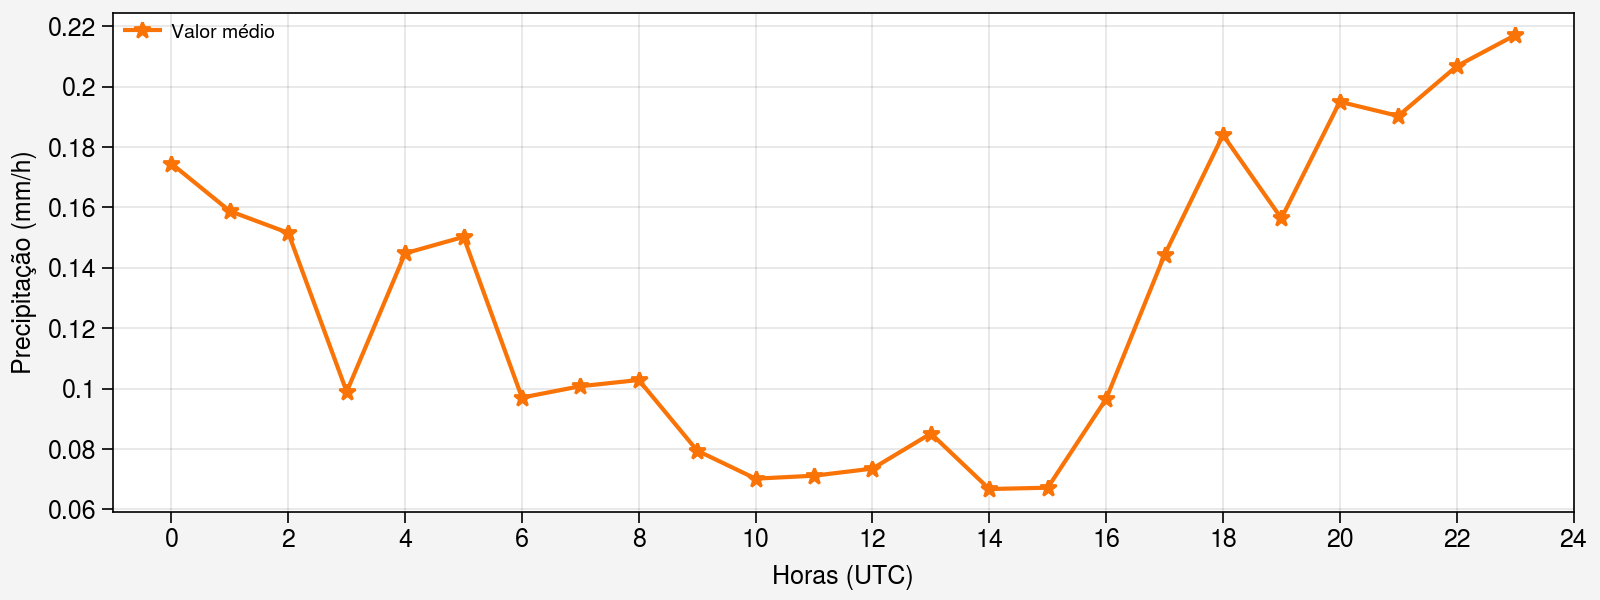

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(8, 3), sharey=False, tight=True)

# plota a precipitação
ax.plot(uplt.arange(0, 23, 1), horaria_climatologica['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='orange', marker='*', label='Valor médio')

# formatação dos eixos X e Y
ax.format(xlabel='Horas (UTC)', ylabel='Precipitação (mm/h)', xticks=2, xtickminor=False, ytickminor=False, xlim=(-1,24))

# legendas
ax.legend(frameon=False, loc='ul', prop={'size': 7})

# salva figura
fig.save(f'{dir}/output/Fig_1a_horario_climatologia_precipitacao.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

In [ ]:
np.arange(0, 23, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

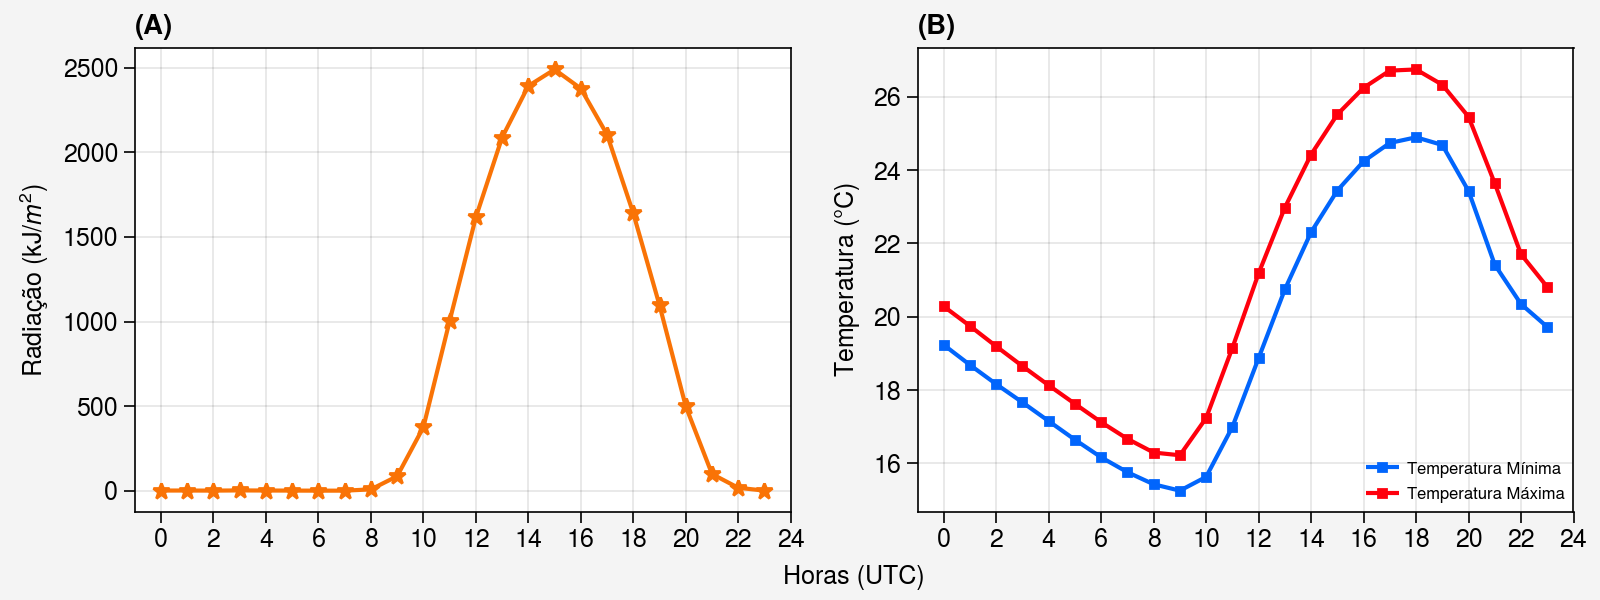

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(8, 3), ncols=2, sharey=False, tight=True, abc='(A)')

# radiação
ax[0].plot(uplt.arange(0, 23, 1), horaria_climatologica['RADIACAO GLOBAL (Kj/m²)'], color='orange', marker='*')
ax[0].format(xlabel='Horas (UTC)', ylabel='Radiação (kJ/$m^{2}$)', xticks=2, xtickminor=False, ytickminor=False, xlim=(-1,24))

# temperaturas
ax[1].plot(uplt.arange(0, 23, 1), horaria_climatologica['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], color='bright blue', marker='s', markersize=3, label='Temperatura Mínima')
ax[1].plot(uplt.arange(0, 23, 1), horaria_climatologica['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], color='bright red', marker='s', markersize=3, label='Temperatura Máxima')
ax[1].format(xlabel='Horas', ylabel='Temperatura ($\degree$C)', xticks=2, xtickminor=False, ytickminor=False, xlim=(-1,24))

# legendas
ax[1].legend(frameon=False, loc='lr', prop={'size': 6}, ncols=1)

# salva figura
fig.save(f'{dir}/output/Fig_1b_horario_climatologia_radiacao_temperatura.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

# **PARTE 4):**  Ciclo Diário: total

In [ ]:
diaria

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01,9.2,905.216667,905.516667,904.970833,1473.607143,22.545833,18.504167,23.166667,21.900000,18.904167,17.933333,82.666667,75.875000,79.416667,174.416667,4.158333,1.470833
2020-01-02,9.4,904.779167,905.025000,904.450000,642.871429,20.595833,18.425000,21.183333,20.120833,18.812500,18.095833,89.958333,84.583333,87.541667,184.708333,3.887500,1.433333
2020-01-03,8.6,905.370833,905.637500,905.120833,1143.200000,21.383333,18.100000,21.941667,20.750000,18.537500,17.487500,85.916667,79.583333,82.833333,158.791667,3.862500,1.262500
2020-01-04,4.0,904.387500,904.737500,904.058333,1111.673333,21.245833,18.225000,21.895833,20.725000,18.695833,17.625000,86.375000,80.791667,84.166667,137.208333,4.791667,1.350000
2020-01-05,25.8,903.779167,904.079167,903.483333,1549.200000,21.804167,18.295833,22.520833,20.879167,18.912500,17.604167,86.125000,78.458333,82.000000,178.833333,4.929167,1.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,17.2,907.350000,907.500000,907.112500,719.435714,20.445833,19.033333,20.729167,20.183333,19.300000,18.791667,92.791667,90.541667,91.750000,286.750000,7.354167,2.791667
2024-12-28,4.4,907.920833,908.220833,907.700000,1068.180000,21.645833,19.033333,22.100000,21.137500,19.433333,18.620833,88.666667,83.875000,86.000000,109.750000,3.916667,1.637500
2024-12-29,26.8,906.645833,906.966667,906.345833,1216.021429,21.579167,17.933333,22.387500,20.962500,18.695833,17.229167,84.291667,77.041667,81.250000,128.916667,4.829167,1.550000


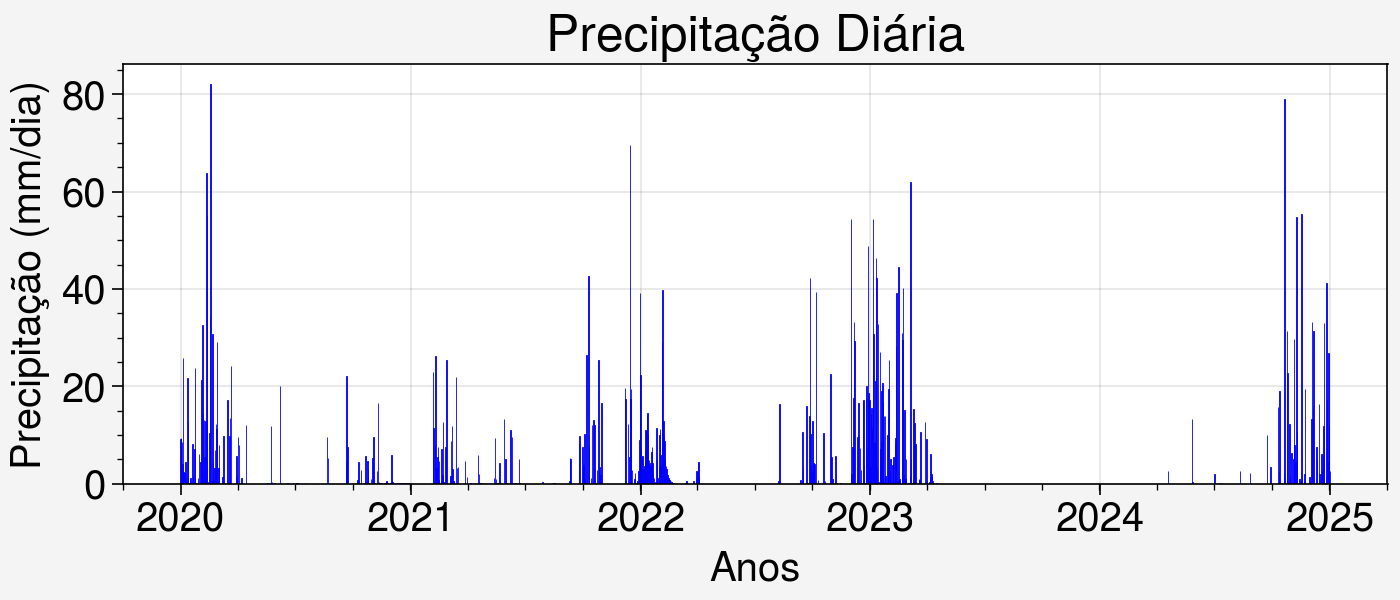

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(7, 3), tight=True)

# plota gráfico de barras
ax.bar(diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].index,
       diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'],
       color='blue')

# formato dos eixos
ax.format(title='Precipitação Diária',
          xlabel='Anos',
          ylabel='Precipitação (mm/dia)',
          small='20px',
          large='25px',
          xrotation=0)

# salva figura
fig.save(f'{dir}/output/Fig_2_diario_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 5):**  Ciclo Mensal: total e climatológica

**Mensal Total**

In [ ]:
mensal

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-31,152.4,906.879032,907.130914,906.615323,1283.888506,22.146774,18.273522,22.814113,21.531048,18.845833,17.729570,83.526882,77.294355,80.518817,157.995968,4.167742,1.447312
2020-02-29,453.2,908.563937,908.813937,908.309195,1147.730882,21.658477,18.470833,22.278017,21.098132,18.969540,18.005460,86.166667,80.544540,83.469828,167.564655,4.500000,1.538075
2020-03-31,96.0,909.233917,909.480350,908.987483,1513.387562,21.269314,15.962853,21.987887,20.584926,16.568506,15.375908,77.351279,70.601615,74.010767,137.977120,4.283984,1.559623
2020-04-30,31.4,910.431250,910.650278,910.211806,1434.906540,20.054583,14.829722,20.838333,19.337361,15.436389,14.284028,77.350000,70.705556,74.075000,160.062500,3.854444,1.371667
2020-05-31,12.8,911.642876,911.867608,911.414516,1382.975424,16.992473,11.083737,17.779704,16.236694,11.643145,10.534005,74.014785,67.651882,70.875000,172.404570,3.894892,1.438172
2020-06-30,20.8,912.860556,913.084028,912.632361,1313.096687,17.849722,12.167222,18.673750,17.065556,12.737083,11.630139,74.951389,68.527778,71.808333,141.516667,3.903056,1.431111
2020-07-31,0.6,912.496909,912.703091,912.276075,1371.199189,18.199328,10.398118,19.117204,17.311694,10.993280,9.813038,67.051075,60.158602,63.590054,146.973118,4.324462,1.685618
2020-08-31,14.8,912.797849,913.031855,912.568011,1501.767819,18.165591,9.049731,19.047043,17.305780,9.590591,8.487097,62.455645,56.142473,59.306452,130.936828,4.954839,2.042070
2020-09-30,34.2,910.998056,911.255694,910.749444,1544.364524,22.576944,9.572917,23.515417,21.659306,10.233333,8.912778,52.183333,45.861111,48.983333,143.730556,5.140833,2.106250


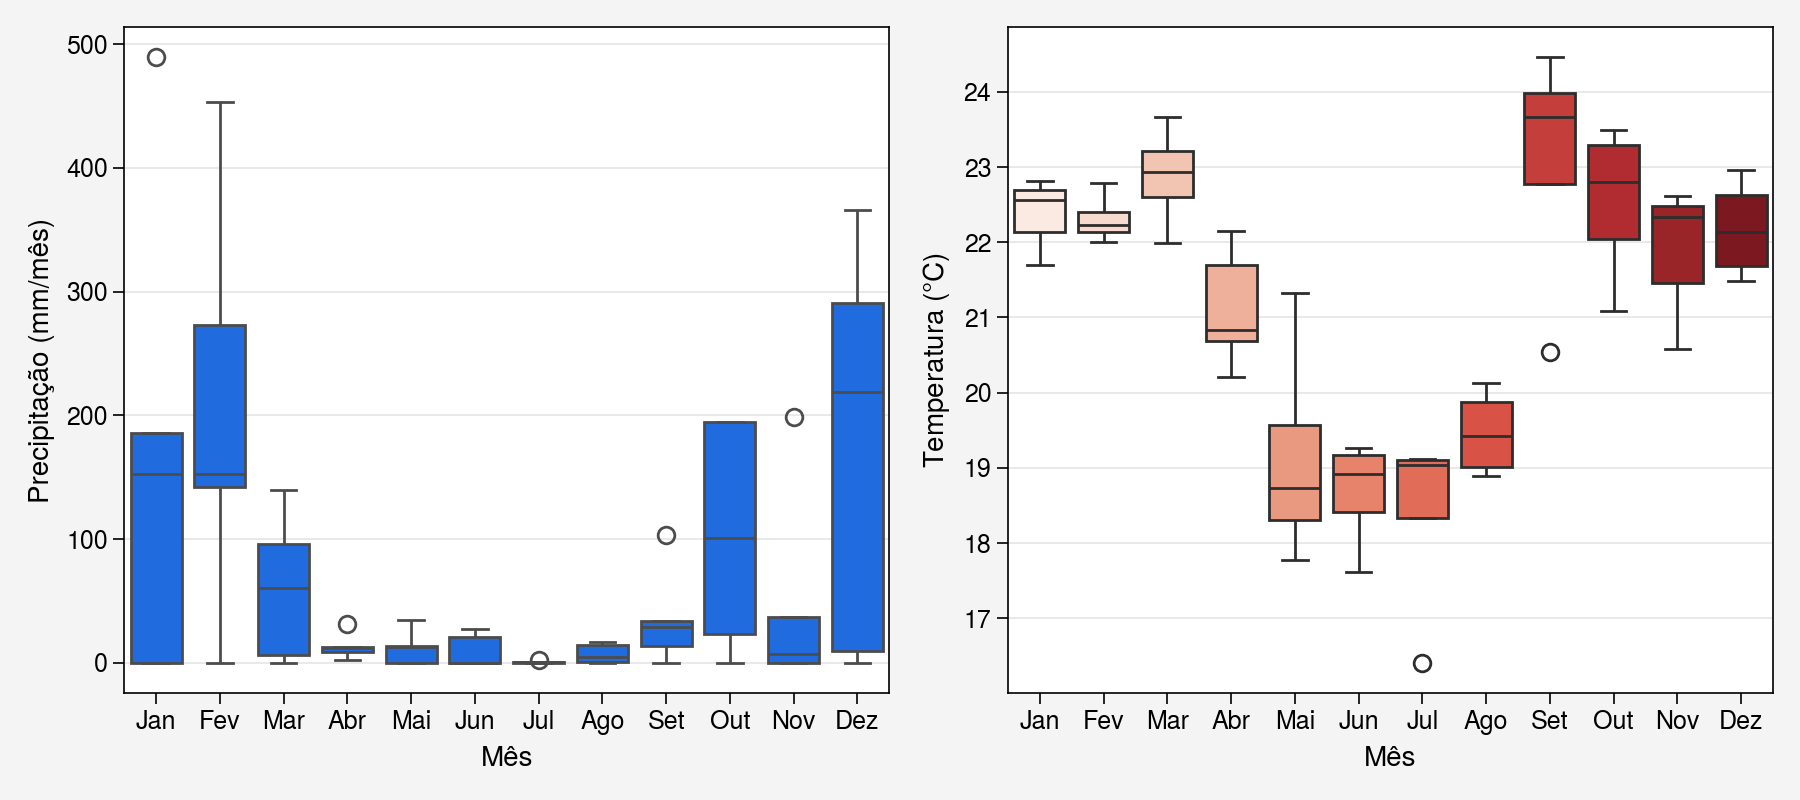

In [ ]:
# cria moldura da figura
fig, ax = plt.subplots(figsize=(9, 4), ncols=2)

# criar boxplot de precipitação mensal
sns.boxplot(x=mensal.index.month, y=mensal['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], ax=ax[0], color='bright blue')
ax[0].set_xlabel('Mês', fontsize=10)
ax[0].set_ylabel('Precipitação (mm/mês)', fontsize=10)
ax[0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[0].minorticks_off()

# boxplot de temperatura mensal
sns.boxplot(x=mensal.index.month, y=mensal['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], ax=ax[1], palette='Reds')
ax[1].set_xlabel('Mês', fontsize=10)
ax[1].set_ylabel('Temperatura ($\degree$C)', fontsize=10)
ax[1].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[1].minorticks_off()

# salva figura
plt.savefig(f'{dir}/output/Fig_3a_mensal_precipitacao.jpg', dpi=300, bbox_inches='tight')

# exibe figura na tela
plt.tight_layout()
plt.show()

**Mensal climatológica**

In [ ]:
mensal_climatologia

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
1,165.52,907.351568,907.606944,907.090099,1271.486470,21.710753,18.011649,22.358199,21.121371,18.567697,17.491980,84.082437,78.206989,81.262545,169.676971,4.572357,1.601882
2,204.20,907.983279,908.241206,907.722212,1298.555595,21.650371,17.877081,22.313489,21.048869,18.433360,17.363827,83.734065,77.719017,80.834461,162.898740,4.403339,1.572614
3,60.64,909.019265,909.267399,908.771770,1513.807438,22.108659,16.582447,22.880103,21.393611,17.197805,15.973245,76.515575,69.459544,73.081657,148.373648,4.379363,1.678279
4,13.68,909.801236,910.021522,909.573918,1473.717651,20.327742,14.560795,21.115360,19.592272,15.157428,14.003168,75.244153,68.657990,71.986511,152.549487,3.993122,1.532043
5,12.24,911.382329,911.606971,911.154760,1352.356529,18.310700,12.193509,19.142238,17.536758,12.790751,11.612605,73.463338,66.825183,70.230666,160.652204,3.826864,1.454651
6,9.64,912.069664,912.290033,911.853873,1332.373128,17.813155,11.569744,18.673513,17.000290,12.181743,11.017855,72.867095,66.235343,69.578849,154.304492,3.774588,1.451362
7,0.76,912.636866,912.853341,912.415427,1435.359131,17.465948,8.753155,18.399390,16.572373,9.357149,8.156559,63.641913,56.769809,60.232255,152.728655,4.419188,1.823861
8,7.44,912.753864,912.990121,912.518716,1496.974265,18.564785,8.591599,19.465591,17.690087,9.145665,8.033703,59.784274,53.526882,56.657258,140.603159,4.978965,2.065793
9,36.00,910.453160,910.716319,910.192882,1526.361347,22.186701,10.533715,23.086840,21.328160,11.114132,9.948819,55.719097,49.597917,52.670139,148.925000,5.204410,2.114757


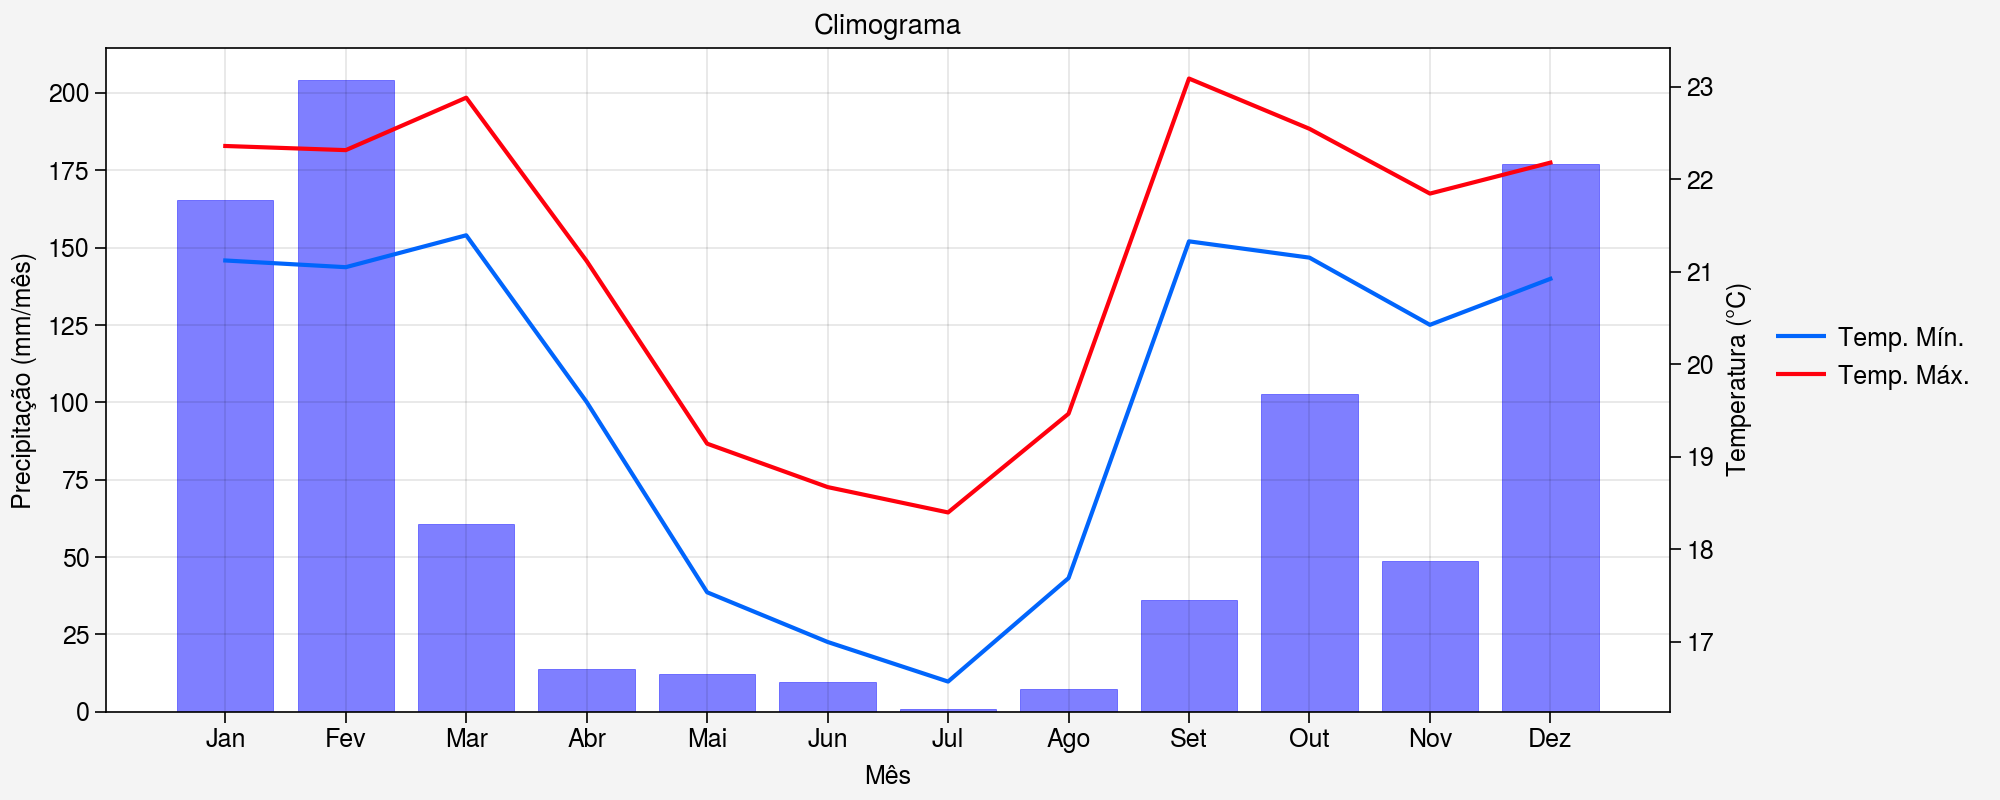

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,4), tight=True)

# eixos gêmeos em x
ax2 = ax.twinx()

# precipitação
ax.bar(uplt.arange(1, 12, 1), mensal_climatologia['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue', alpha=0.5)

# temperaturas
ax2.plot(uplt.arange(1, 12, 1), mensal_climatologia['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], color='bright blue', label='Temp. Mín.')
ax2.plot(uplt.arange(1, 12, 1), mensal_climatologia['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], color='bright red', label='Temp. Máx.')

# formatações
ax.format(title='Climograma',
          xlabel='Mês', ylabel='Precipitação (mm/mês)',
          xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
          xticks=uplt.arange(1, 12, 1),
          xtickminor=False, ytickminor=False)

# formato do segundo eixo Y (a direita)
ax2.format(ylabel='Temperatura ($\degree$C)', ytickminor=False)

# legenda
ax2.legend(bbox_to_anchor=(1.2, 0.6), ncols=1, frameon=False)

# salva figura
fig.save(f'{dir}/output/Fig_3b_mensal_climatologia_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

Como podemos ver, criar *boxplots* é uma tarefa razoavelmente simples com Python e `Seaborn`. É possível fazer muito mais (veja a seção da [*Python Graph Gallery*](https://www.python-graph-gallery.com/boxplot/) sobre o tema), como *violinplots* e combinar *stripplots* nos gráficos.

# **PARTE 6):**  Ciclo Anual: total

In [ ]:
anual

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-12-31,885.8,909.989844,910.235637,909.742355,1390.149947,20.426585,13.817158,21.214539,19.684220,14.394068,13.256666,72.643060,66.273369,69.511556,152.187749,4.525914,1.711135
2021-12-31,727.8,910.052093,910.297093,909.805328,1421.366318,19.611476,12.680690,20.432967,18.842245,13.282334,12.105788,71.158437,64.525247,67.894700,151.006120,4.560134,1.769509
2022-12-31,941.8,908.849869,909.104253,908.592121,1402.885289,20.694655,14.603889,21.441888,19.999024,15.174163,14.053102,74.302214,68.081998,71.267550,154.229682,4.714800,1.830178
2023-12-31,915.8,909.405273,909.652733,909.156571,1352.787270,20.550718,16.084925,21.265047,19.897211,16.659580,15.535892,80.554390,74.273882,77.531198,162.199613,4.300939,1.634152
2024-12-31,722.2,910.655782,910.892436,910.417039,1394.923571,20.805313,12.784046,21.621639,20.026450,13.352575,12.234305,67.386297,61.204730,64.315031,151.859734,4.617528,1.857289


In [ ]:
anual.index.year

Index([2020, 2021, 2022, 2023, 2024], dtype='int32', name='Data_Hora')

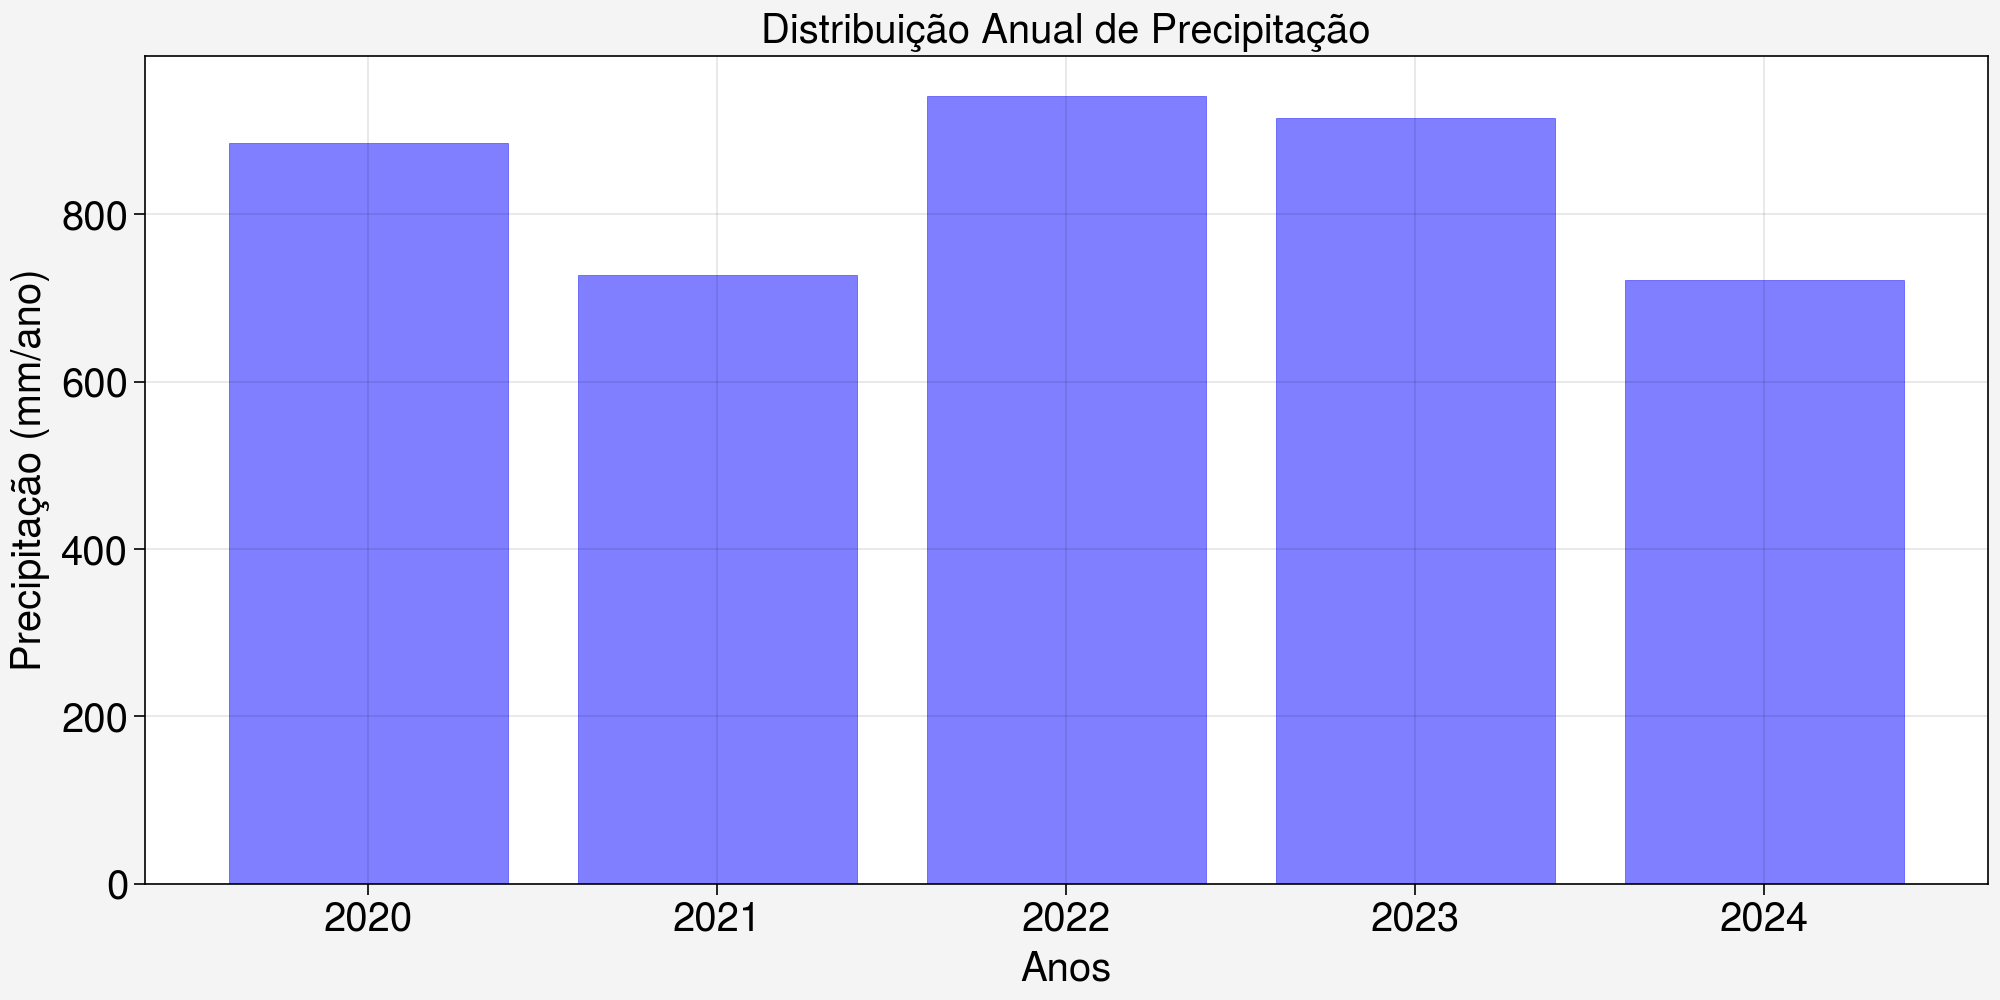

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year, anual['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue', alpha=0.5)

# formatação do eixo
ax.format(title='Distribuição Anual de Precipitação', xlabel='Anos', ylabel='Precipitação (mm/ano)',
          small='20px', large='20px',
          xtickminor=False, ytickminor=False)

# salva figura
fig.save(f'{dir}/output/Fig_4_anual_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 7):** Salvando a tabela num arquivo CSV

**Podemos `renomear` cada uma delas atribuindo uma lista a `ems_mensal.columns`. Isto é:**

In [ ]:
# mostrando os dados mensais
mensal

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-31,152.4,906.879032,907.130914,906.615323,1283.888506,22.146774,18.273522,22.814113,21.531048,18.845833,17.729570,83.526882,77.294355,80.518817,157.995968,4.167742,1.447312
2020-02-29,453.2,908.563937,908.813937,908.309195,1147.730882,21.658477,18.470833,22.278017,21.098132,18.969540,18.005460,86.166667,80.544540,83.469828,167.564655,4.500000,1.538075
2020-03-31,96.0,909.233917,909.480350,908.987483,1513.387562,21.269314,15.962853,21.987887,20.584926,16.568506,15.375908,77.351279,70.601615,74.010767,137.977120,4.283984,1.559623
2020-04-30,31.4,910.431250,910.650278,910.211806,1434.906540,20.054583,14.829722,20.838333,19.337361,15.436389,14.284028,77.350000,70.705556,74.075000,160.062500,3.854444,1.371667
2020-05-31,12.8,911.642876,911.867608,911.414516,1382.975424,16.992473,11.083737,17.779704,16.236694,11.643145,10.534005,74.014785,67.651882,70.875000,172.404570,3.894892,1.438172
2020-06-30,20.8,912.860556,913.084028,912.632361,1313.096687,17.849722,12.167222,18.673750,17.065556,12.737083,11.630139,74.951389,68.527778,71.808333,141.516667,3.903056,1.431111
2020-07-31,0.6,912.496909,912.703091,912.276075,1371.199189,18.199328,10.398118,19.117204,17.311694,10.993280,9.813038,67.051075,60.158602,63.590054,146.973118,4.324462,1.685618
2020-08-31,14.8,912.797849,913.031855,912.568011,1501.767819,18.165591,9.049731,19.047043,17.305780,9.590591,8.487097,62.455645,56.142473,59.306452,130.936828,4.954839,2.042070
2020-09-30,34.2,910.998056,911.255694,910.749444,1544.364524,22.576944,9.572917,23.515417,21.659306,10.233333,8.912778,52.183333,45.861111,48.983333,143.730556,5.140833,2.106250


**Para formatar melhor a tabela, você pode remover o `index` de datas e criar novas colunas para os anos e meses.**

In [ ]:
# remover o índice de datas
nova_tabela = mensal.reset_index(drop=True)

# incluir uma coluna de danos na posição 1
nova_tabela.insert(0, 'Ano', mensal.index.year)

# incluir uma coluna de meses na posição 2
nova_tabela.insert(1, 'Mes', mensal.index.month)

In [ ]:
nova_tabela

,Ano,Mes,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020,1,152.4,906.879032,907.130914,906.615323,1283.888506,22.146774,18.273522,22.814113,21.531048,18.845833,17.729570,83.526882,77.294355,80.518817,157.995968,4.167742,1.447312
1,2020,2,453.2,908.563937,908.813937,908.309195,1147.730882,21.658477,18.470833,22.278017,21.098132,18.969540,18.005460,86.166667,80.544540,83.469828,167.564655,4.500000,1.538075
2,2020,3,96.0,909.233917,909.480350,908.987483,1513.387562,21.269314,15.962853,21.987887,20.584926,16.568506,15.375908,77.351279,70.601615,74.010767,137.977120,4.283984,1.559623
3,2020,4,31.4,910.431250,910.650278,910.211806,1434.906540,20.054583,14.829722,20.838333,19.337361,15.436389,14.284028,77.350000,70.705556,74.075000,160.062500,3.854444,1.371667
4,2020,5,12.8,911.642876,911.867608,911.414516,1382.975424,16.992473,11.083737,17.779704,16.236694,11.643145,10.534005,74.014785,67.651882,70.875000,172.404570,3.894892,1.438172
5,2020,6,20.8,912.860556,913.084028,912.632361,1313.096687,17.849722,12.167222,18.673750,17.065556,12.737083,11.630139,74.951389,68.527778,71.808333,141.516667,3.903056,1.431111
6,2020,7,0.6,912.496909,912.703091,912.276075,1371.199189,18.199328,10.398118,19.117204,17.311694,10.993280,9.813038,67.051075,60.158602,63.590054,146.973118,4.324462,1.685618
7,2020,8,14.8,912.797849,913.031855,912.568011,1501.767819,18.165591,9.049731,19.047043,17.305780,9.590591,8.487097,62.455645,56.142473,59.306452,130.936828,4.954839,2.042070
8,2020,9,34.2,910.998056,911.255694,910.749444,1544.364524,22.576944,9.572917,23.515417,21.659306,10.233333,8.912778,52.183333,45.861111,48.983333,143.730556,5.140833,2.106250
9,2020,10,23.2,908.162500,908.447043,907.884140,1372.986139,22.686559,14.058065,23.489113,21.958199,14.575269,13.530511,64.841398,58.836022,61.947581,148.223118,5.331586,2.127688


**E agora, você pode `salvar` o `DataFrame` em formato csv com `.to_csv()`:**

In [ ]:
mensal.to_csv(f'{dir}/output/tabela_mensal.csv')